In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from palmerpenguins import load_penguins

In [2]:
import names
from adjustText import adjust_text

The first step is to drop observations with missing values.

In [1]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/opentype/urw-base35/P052-Bold.otf',
 '/usr/share/fonts/opentype/mathjax/MathJax_Main-Regular.otf',
 '/usr/share/fonts/truetype/noto/NotoSansNewa-Regular.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansCham-Bold.ttf',
 '/usr/share/fonts/opentype/stix/STIXSizeFourSym-Bold.otf',
 '/usr/share/fonts/truetype/padauk/PadaukBook-Bold.ttf',
 '/usr/share/fonts/truetype/lohit-telugu/Lohit-Telugu.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansKhmer-Regular.ttf',
 '/usr/share/fonts/truetype/junicode/Junicode-Bold.ttf',
 '/usr/share/fonts/opentype/mathjax/MathJax_WinIE6-Regular.otf',
 '/usr/share/fonts/truetype/lato/Lato-Italic.ttf',
 '/usr/share/fonts/truetype/adf/AccanthisADFStdNo3-BoldItalic.otf',
 '/usr/share/fonts/truetype/roboto/unhinted/RobotoTTF/Roboto-ThinItalic.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansSaurashtra-Regular.ttf',
 '/usr/share/fonts/truetype/artemisia/GFSArtemisiaBoldIt.otf',
 '/usr/share/fonts/truetype/noto/NotoSansBassaVah-Regular.ttf',
 '/usr/share/fo

In [3]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [2]:
font_manager.findfont("Poppins")

'/home/tomas/.local/share/fonts/Poppins-Regular.ttf'

In [4]:
penguins = penguins.dropna()
SPECIES = sorted(penguins["species"].unique())

In [5]:
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
GREY30 = "#4d4d4d"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

COLORS = ["#386cb0", "#fdb462", "#7fc97f" ]
 
# Horizontal positions for the violins
POSITIONS = [0, 1, 2]

# Horizontal lines
HLINES = [40, 50, 60]

In [6]:
# Generate a list of random na
names_list = [names.get_first_name() for i in range(len(penguins))]

150

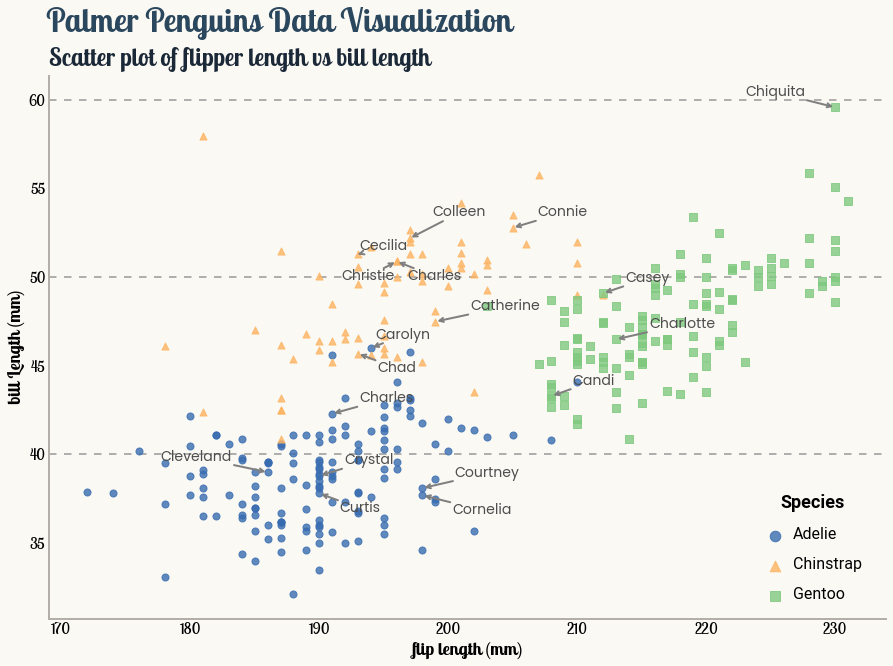

In [90]:
fig, ax = plt.subplots(figsize= (15, 10))

# Some layout stuff ----------------------------------------------
# Background color

fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

for h in HLINES:
    plt.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)
    
MARKERS = ["o", "^", "s"] # circle, triangle, square

for sp, color, marker  in zip(SPECIES, COLORS, MARKERS):
    data = penguins[penguins["species"] == sp]
    ax.scatter(
        "flipper_length_mm", "bill_length_mm", s=50, color=color, marker=marker, alpha=0.8, data=data
    )

texts = []
for i in range(len(penguins)):
    if NAMES[i].startswith("C"):
        x = penguins["flipper_length_mm"].iloc[i]
        y = penguins["bill_length_mm"].iloc[i]
        text = NAMES[i]
        texts.append(ax.text(x, y, text, color=GREY30, fontsize=14, fontname="Poppins"))


plt.suptitle(
    "Palmer Penguins Data Visualization",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=32,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
)

ax.set_title(
    "Scatter plot of flipper length vs bill length",
    loc="left",
    ha="left",
    fontsize=24,
    fontname="Lobster Two",
    color=BLUE_DARK,
    weight="bold",
    pad=10
)

# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
plt.tick_params(length=0)
plt.yticks(fontname="Lobster Two", fontsize=15)
plt.ylabel("bill Length (mm)", fontname="Lobster Two", fontsize=18, fontweight="bold")

plt.xticks(fontname="Lobster Two", fontsize=15)
plt.xlabel("flip length (mm)", fontname="Lobster Two", fontsize=18, fontweight="bold")


legend = ax.legend(
    loc=(0.85, 0.025),
    labelspacing = 1.5,
    markerscale = 1.5,
    frameon=False
)
legend.set_title("Species")

for text, sp in zip(legend.get_texts(), SPECIES):
    text.set_text(sp)
    text.set_fontname("Roboto")
    text.set_fontsize(16)
    text.set_linespacing(10)

legend_title = legend.get_title()
legend_title.set_fontname("Roboto")
legend_title.set_fontweight("bold")
legend_title.set_fontsize(18)
legend_title.set_ha("left")
    
adjust_text(
    texts, 
    expand_points=(2, 2), 
    arrowprops=dict(
        arrowstyle="->", 
        color=GREY50, 
        lw=2
    )
)